In [19]:
using Plots, ComplexPhasePortrait, ApproxFun, DualNumbers, SpecialFunctions
gr()

Plots.GRBackend()

# M3M6: Methods of Mathematical Physics (2018)


$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\E{{\rm e}}
\def\dx{\D x}
\def\dt{\D t}
\def\dz{\D z}
\def\C{{\mathbb C}}
\def\R{{\mathbb R}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qqfor{\qquad\hbox{for}\qquad}
\def\qqwhere{\qquad\hbox{where}\qquad}
\def\Res_#1{\underset{#1}{\rm Res}}\,
\def\sech{{\rm sech}\,}
\def\vc#1{{\mathbf #1}}
$$

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk

Office Hours: 4-5pm Mondays, Huxley 6M40
<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes


## Overview of course


1. Complex analysis, Cauchy's theorem, residual calculus
3. Singular integrals of the form
$$\int_\Gamma {u(\zeta) \over z - \zeta}  d\zeta,$$
$$\int_\Gamma u(\zeta) \log|z - \zeta|  ds$$
with applications to PDEs, airfoil design, etc.
2. Weiner–Hopf method with applications to integral equations with integral operators
$$\int_0^\infty K(x-y) u(y)  dy$$
4. Orthogonal polynomials, with applications to Schrödinger operators, solving differential equations.
5. Singularities of differential equations and hypergeometric functions

_Central themes_: 

1. Finding "nice" formulae for problems that arise in physics. These can be closed form solution, sums, integral representations, special functions, etc.
2. Computational tools for approximate solutions to problems that arise in physics.


_Applications_ (not necessarily discussed in the course):

1. Ideal fluid flow
2. Acoustic scattering
3. Electrostatics (Faraday cage)
4. Fracture mechanics
5. Schrödinger equations
6. Shallow water waves


## The Project

There is a project worth 10%. This project is _open ended_: you propose a topic. This could be computational based (possibly based on the slides), theoretical based (possibly looking at material from Ablowitz & Fokas), or otherwise. If you are having difficulty coming up with a proposal, please attend the office hours for advice.

Timeline:

* 14 Nov: Turn in short description of proposed project (max 2 paragraphs)
* 14 Dec: Project due





# Lecture 1: Complex analysis reivew

The first few lectures will review the basics of complex analysis. We will use plots to help explain the material, and so this first lecture will focus on getting comfortable with plots of analytic functions.


## Plotting functions in the complex plane


Consder a complex-valued function $f : D \rightarrow {\mathbb C}$ where $D \subset {\mathbb C}$. To help understand such functions it is useful to plot them.  But how?

### Method 1: real and imaginary parts

Every complex-valued function can be written as $f(z) = u(z) + i v(z)$ where $u : D \rightarrow {\mathbb R}$ and $v : D \rightarrow {\mathbb R}$ are real-valued. These are easy to plot separately. We can do a surface plot:

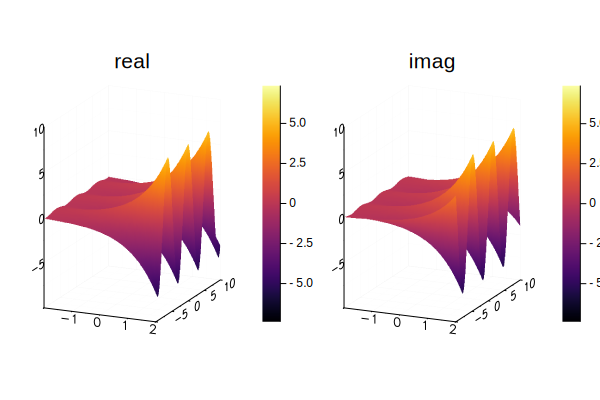

In [2]:
f = z -> exp(z)
u = z -> real(f(z))
v = z -> imag(f(z))

# set up plotting grid
xx = range(-2 ; stop=2,  length=100)
yy = range(-10; stop=10, length=100)

plot(surface(xx, yy, u.(xx' .+ im.*yy); title="real"),
     surface(xx, yy, v.(xx' .+ im.*yy); title="imag"))

Or a heat plot:

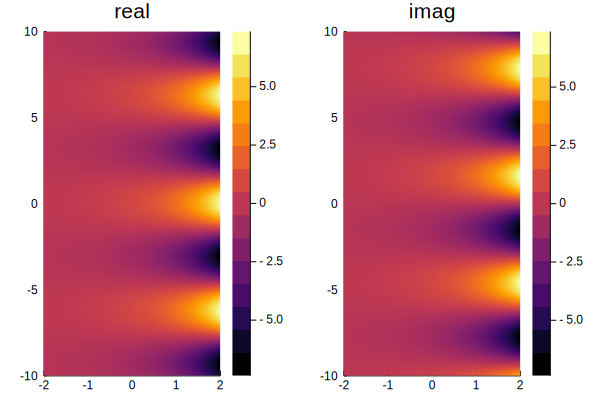

In [3]:
plot(contourf(xx, yy, u.(xx' .+ im.*yy); title="real"),
     contourf(xx, yy, v.(xx' .+ im.*yy); title="imag"))

### Method 2: absolute-value and angle

Every complex number $z$ can be written as $re^{i \theta}$ for $0 \leq r$ and $-\pi < \theta \leq \pi$. $r = |z|$ is called the _absolute value_ and $\theta$ is called the _phase_ or _argument_ (or in Julia, _angle_).  We can plot these:

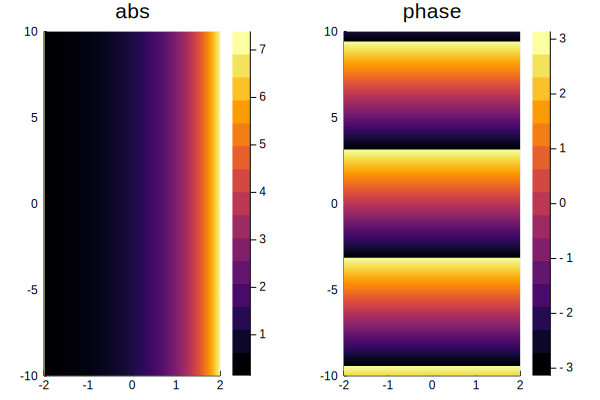

In [4]:
xx = -2:0.01:2
yy = -10:0.01:10

f = z -> exp(z)

r = z -> abs(f(z))
θ = z -> angle(f(z))


plot( contourf(xx, yy, r.(xx' .+ im.*yy); title="abs"),
      contourf(xx, yy, θ.(xx' .+ im.*yy); title="phase"))

### Method 3: Phase portrait

This method is essentially the same, as before, but to _only_ plot the phase, and use a "colour wheel" to reflect the topology of $\theta$. 

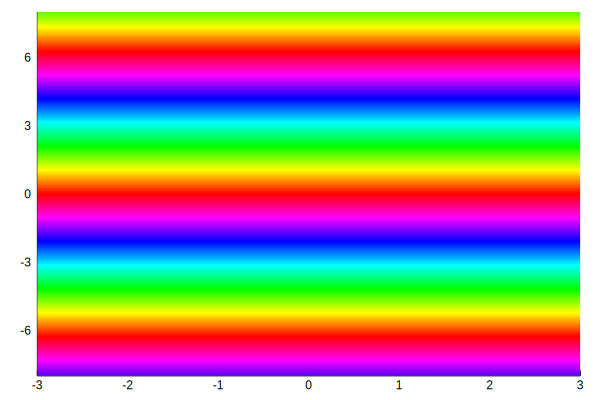

In [5]:
phaseplot(-3..3, -8..8, z -> exp(z))

This is seen most clearly with $f(z) = z$: in this case, letting $z = r \E^{\I \theta}$ we are simply plotting $\theta$:

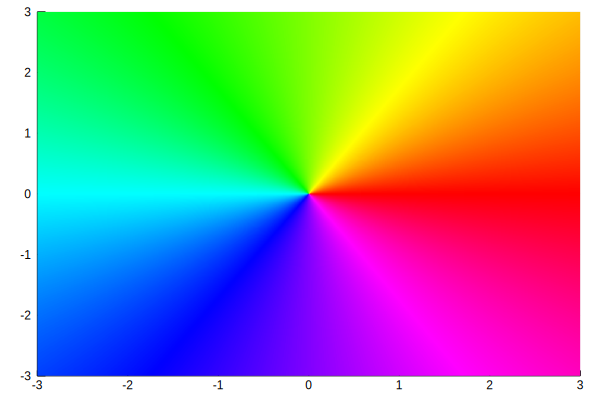

In [6]:
phaseplot(-3..3, -3..3, z -> z)

In other words, the colour red corresponds to $\arg f(z) \approx 0$, green to $\arg f(z) \approx {2 \pi \over 3}$ aqua to $\arg f(z) \approx \pi$ and so on. 


Note that multiplying $z$ by a complex number $R \E^{\I \varphi}$ will rotate the wheel, but the colours still appear in the same order when read counter clockwise:

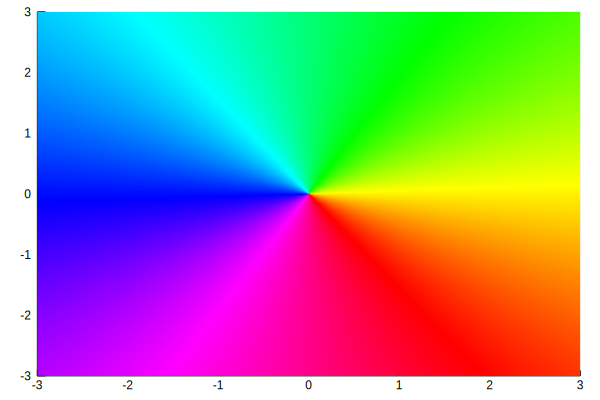

In [7]:
phaseplot(-3..3, -3..3, z -> exp(1.0im)*z)

Therefore, if $f(z)$ has a zero at $z_0$, since it behaves like $f(z) = f'(z_0) (z - z_0)$, we will have the full colour wheel always in the counter clockwise order red–green–blue–red:

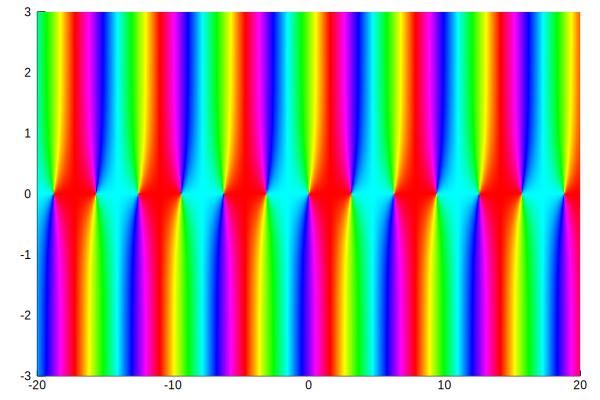

In [8]:
phaseplot(-20..20, -3..3, z -> sin(z))

In the case of a double root like $f(z) = z^2 = r \E^{2 \I \theta}$, we have the wheel appearing twice, but still in the same order. Thus the order of a zero can be seen by the number of times we go around the colour wheel: here we see that the function has a triple root at zero since it goes red–green–blue–red–green–blue–red–green–blue–red:

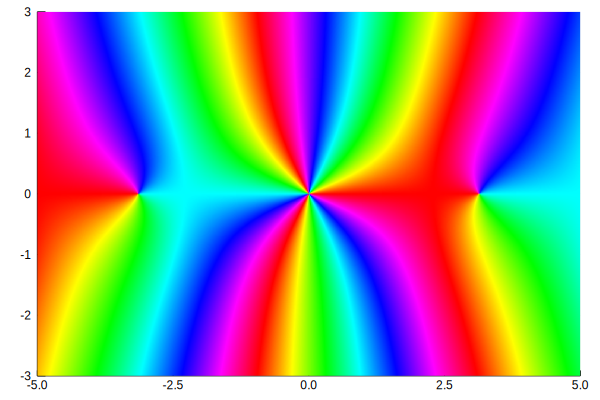

In [9]:
phaseplot(-5..5, -3..3, z -> z^2*sin(z))

On the other hand, if we plot $f(z) = z^{-1} = r^{-1} \E^{-\I \theta}$ the wheel is reversed to  be red–blue–green–red:

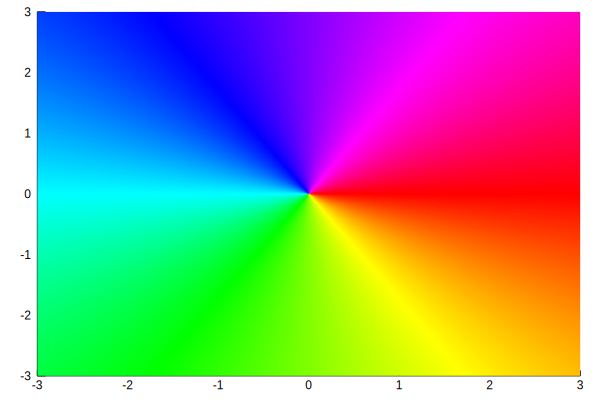

In [10]:
phaseplot(-3..3, -3..3, z -> 1/z)

Thus we can see from a phase plot where the poles and zeros are, and the order of the poles and roots: the following function has a double pole at 0 (red–blue–green–red–blue–green), a zero at $-{\pi \over 2}$ (red–green–blue–red) and a double zero at $\pi\over 2$ (red–green–blue–red–green–blue–red) :

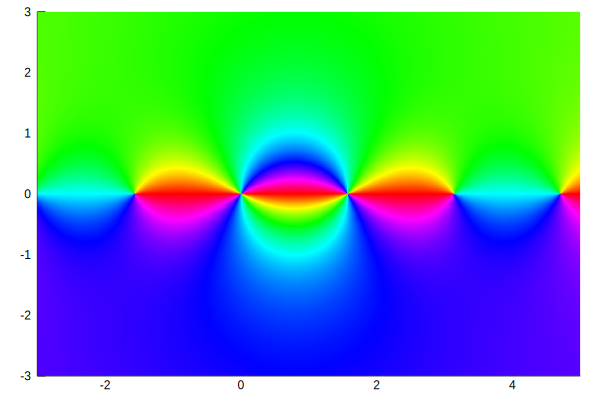

In [11]:
phaseplot( -3..5, -3..3, z -> cot(z)/z*(π/2-z))

Functions with more complicated singularities do not have such nice phase plots (these are what we will call _essential_ singularities):

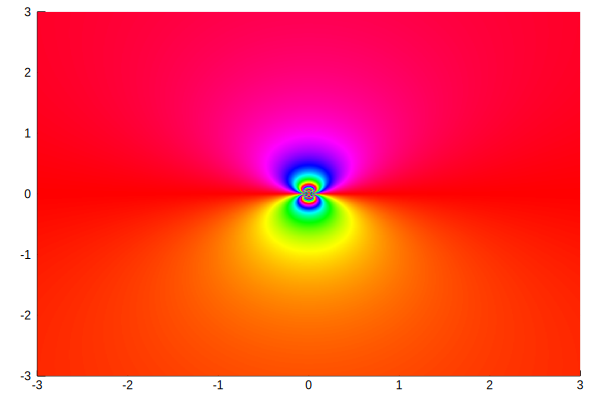

In [12]:
phaseplot(-3..3, -3..3, z -> exp(1/z))

The jumps of functions like $\log z$ or $\sqrt z$ also appear naturally in the phase plot: here we see $\log z$ has a zero at $1$ (red–green–blue–red) and a jump along $(-\infty,0]$

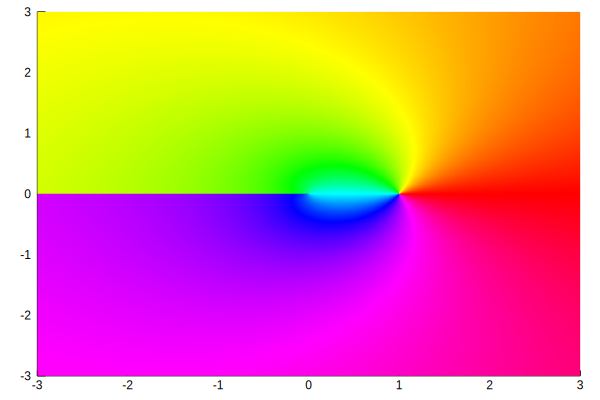

In [13]:
phaseplot( -3..3, -3..3, z -> log(z))

Often, singularities are in the complex plane. can you determine where the zeros and roots, and their orders, of the following function are from the picture?

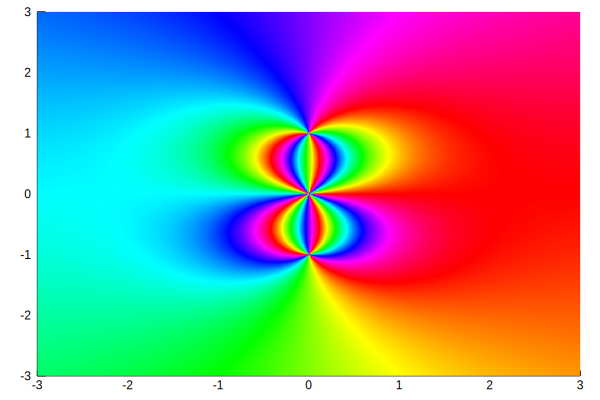

In [14]:
phaseplot(-3..3, -3..3, z -> z^5  / (1 + z^2)^3)

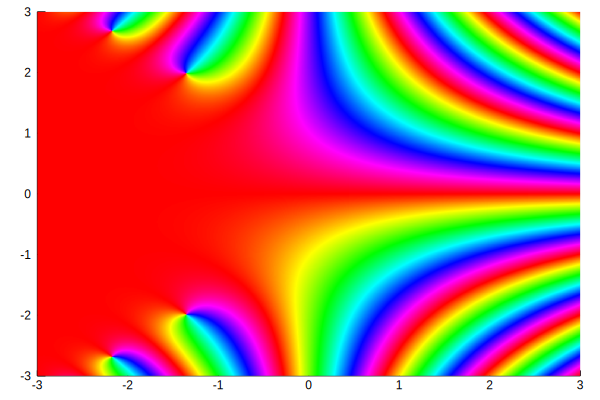

In [15]:
phaseplot(-3..3, -3..3, z -> erfc(z))

Here's the Gamma function. Are they poles or zeros at 0, -1, -2, ...?

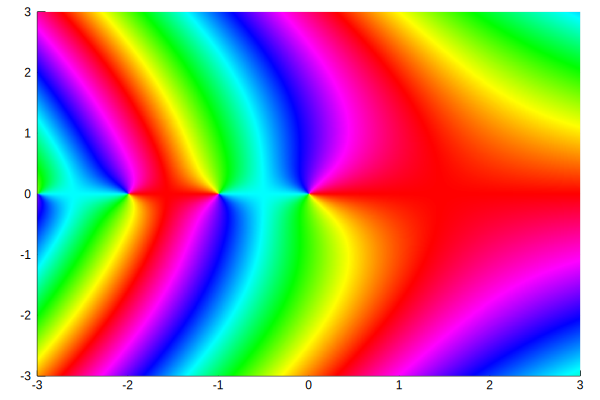

In [16]:
phaseplot(-3..3, -3..3, z -> gamma(z))

Something strange is happening at -1/2, -3/2, .... What if we differentiate? Here `dual(z,1)` is a [dual number](https://en.wikipedia.org/wiki/Dual_number), which provides a convenient way to implement automatic differentiation: `gammap(z)` is derivative of `gamma(z)` w.r.t. `z`.

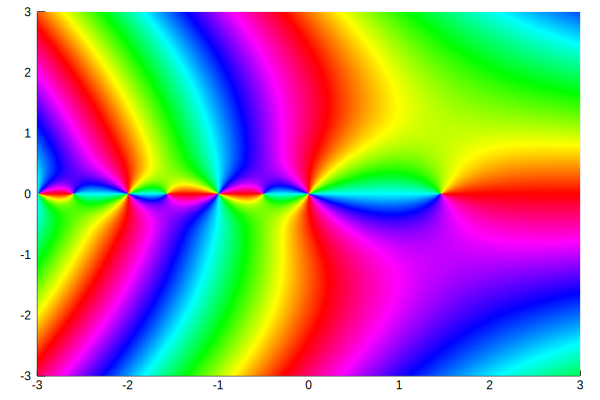

In [17]:
gammap = z -> epsilon(gamma(dual(z,1)))
phaseplot(-3..3, -3..3, gammap) 

Finally, the Riemann Hypothesis: Here is a plot of the Riemann zeta function near the critical line $z = 0.5 + \I t$:

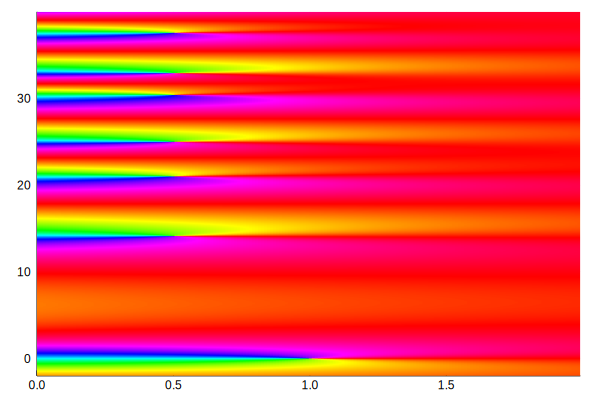

In [20]:
phaseplot(0:0.011:2, -2:0.011:40, zeta)